In [3]:
# link do github: https://github.com/themestrre/Metodos-Numericos

# **Nome:** Carlos Eduardo Leite de Oliveira

# **Matricula:** 242104345

# **MÉTODOS NUMÉRICOS EM CIÊNCIAS MECÂNICAS**

import numpy as np
import matplotlib.pyplot as plt

# Dados Iniciais do Problema

In [4]:
# PARÂMETROS DO SISTEMA (extraídos do diagrama)

# Volumes dos reatores (assumidos unitários)
V1 = V2 = V3 = V4 = V5 = 1.0

# Vazões
Q01 = 5.0
Q03 = 8.0

Q12 = 3.0
Q15 = 3.0

Q23 = 1.0
Q25 = 1.0

Q31 = 1.0
Q34 = 8.0

Q24 = 1.0

Q54 = 2.0
Q55 = 2.0

Q44 = 11.0

# Concentrações de entrada
c01 = 10.0
c03 = 20.0


# Equacionamento do problema


In [5]:
# DEFINIÇÃO DO SISTEMA DE EDOs
def system(c):
    """
    Retorna dc/dt para o sistema de 5 reatores
    """
    c1, c2, c3, c4, c5 = c

    dc1dt = (Q01*c01 + Q31*c3 - Q12*c1 - Q15*c1) / V1
    dc2dt = (Q12*c1 - Q23*c2 - Q24*c2 - Q25*c2) / V2
    dc3dt = (Q03*c03 + Q23*c2 - Q31*c3 - Q34*c3) / V3
    dc4dt = (Q24*c2 + Q34*c3 + Q54*c5 - Q44*c4) / V4
    dc5dt = (Q15*c1 + Q25*c2 - Q54*c5 - Q55*c5) / V5

    return np.array([dc1dt, dc2dt, dc3dt, dc4dt, dc5dt])

# MÉTODO DE RUNGE-KUTTA DE 4ª ORDEM

def rk4_step(f, y, dt):
    """
    Executa um passo do método RK4
    """
    k1 = f(y)
    k2 = f(y + dt/2 * k1)
    k3 = f(y + dt/2 * k2)
    k4 = f(y + dt * k3)

    return y + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

# Solução do sistema transiente

In [6]:
# SIMULAÇÃO TRANSIENTE

# Malha temporal
t0 = 0.0
tf = 20.0
dt = 0.01
t = np.arange(t0, tf, dt)

# Condições iniciais (todas concentrações zero)
c = np.zeros((len(t), 5))

# Integração temporal
for i in range(len(t) - 1):
    c[i+1] = rk4_step(system, c[i], dt)

# Geração de resultados


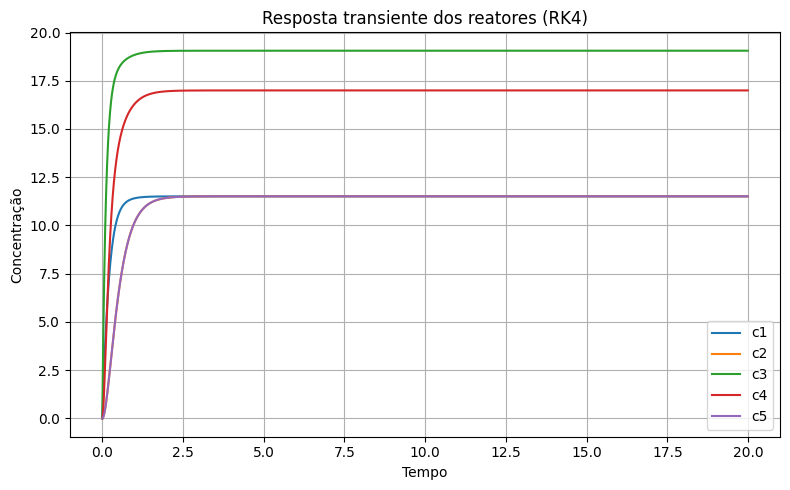

In [7]:
# PLOT DOS RESULTADOS

plt.figure(figsize=(8, 5))

plt.plot(t, c[:, 0], label='c1')
plt.plot(t, c[:, 1], label='c2')
plt.plot(t, c[:, 2], label='c3')
plt.plot(t, c[:, 3], label='c4')
plt.plot(t, c[:, 4], label='c5')

plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.title('Resposta transiente dos reatores (RK4)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
